<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);">資料預處理</h1>

### 讀入模組與資料集

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils
np.random.seed(10)

### 讀取資料

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

### 特徵轉4維矩陣

In [5]:
x_Train4D=x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

### 標籤轉OneHot

In [6]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);">建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16, #
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=36, #
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=128,
                activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(units=10,
                activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);">進行訓練

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [20]:
train_history = model.fit(x=x_Train4D_normalize, 
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10, 
                          batch_size=300,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
75s - loss: 0.4879 - acc: 0.8479 - val_loss: 0.0964 - val_acc: 0.9726
Epoch 2/10
73s - loss: 0.1417 - acc: 0.9585 - val_loss: 0.0631 - val_acc: 0.9803
Epoch 3/10
76s - loss: 0.1024 - acc: 0.9691 - val_loss: 0.0508 - val_acc: 0.9843
Epoch 4/10
71s - loss: 0.0845 - acc: 0.9753 - val_loss: 0.0458 - val_acc: 0.9866
Epoch 5/10
70s - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 6/10
73s - loss: 0.0643 - acc: 0.9806 - val_loss: 0.0395 - val_acc: 0.9881
Epoch 7/10
70s - loss: 0.0569 - acc: 0.9833 - val_loss: 0.0427 - val_acc: 0.9873
Epoch 8/10
70s - loss: 0.0513 - acc: 0.9842 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 9/10
70s - loss: 0.0452 - acc: 0.9864 - val_loss: 0.0342 - val_acc: 0.9901
Epoch 10/10
80s - loss: 0.0431 - acc: 0.9870 - val_loss: 0.0337 - val_acc: 0.9897


<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);">查看資料

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, 
                                  prediction, idx, num=10): #(影像, 真實值, 預測結果, 資料開始index, 顯示筆數)
    fig = plt.gcf() #圖初始
    fig.set_size_inches(12, 14) #圖大小
    if num>25: num=25 #筆數限制
    for i in range(0, num):  
        ax = plt.subplot(5, 5, 1+i) #subgraph大小，位置(5行, 5列, 1開始位置)
        ax.imshow(images[idx], cmap='binary') #畫出subgraph
        title= "lable=" + str(labels[idx]) #subgraph title
        if len(prediction)>0:
            title+=",prediction="+str(prediction[idx]) #subgraph title with prediction
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx +=1
    plt.show()

def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

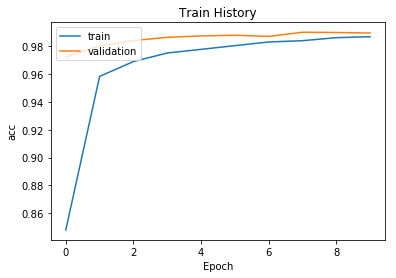

In [22]:
show_train_history(train_history, 'acc', 'val_acc')

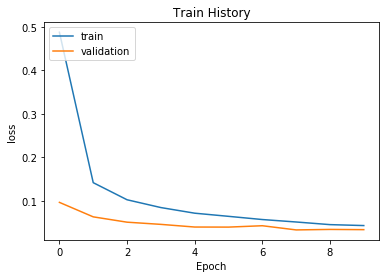

In [23]:
show_train_history(train_history, 'loss', 'val_loss')

<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);">評估準確率

In [25]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

 9984/10000 [============================>.] - ETA: 0s
accuracy= 0.9911


<h1 style="background-image: linear-gradient( 135deg, #52E5E7 10%, #130CB7 100%);">進行預測

In [26]:
prediction = model.predict_classes(x_Test4D_normalize)
prediction

 9920/10000 [============================>.] - ETA: 0s

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

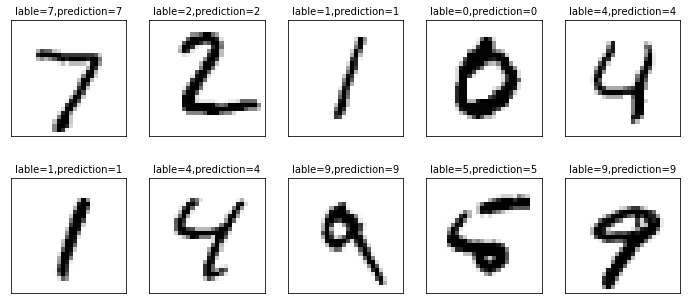

In [27]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0, num=10)

In [29]:
import pandas as pd 
pd.crosstab(y_Test, 
            prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1130,1,0,0,1,1,1,1,0
2,3,1,1022,0,1,0,0,4,1,0
3,0,0,0,1005,0,1,0,2,2,0
4,0,0,0,0,975,0,1,0,1,5
5,1,0,0,6,0,882,2,0,0,1
6,5,2,0,1,1,1,947,0,1,0
7,0,1,2,1,0,0,0,1020,1,3
8,4,0,2,2,1,1,0,2,958,4


In [30]:
df = pd.DataFrame({'label':y_Test, 'predict': prediction})
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [31]:
df[(df.label==5)&(df.predict==3)].head()

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
3157,5,3


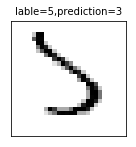

In [32]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=1393, num=1)